In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

# Root Cause Analysis to identify key drivers of F&B satisfaction score during summer months.

In [2]:
ss1=pd.read_csv('Survey data_Inflight Satisfaction Score Clean.csv')
ss1 = ss1.drop(columns=['Unnamed: 0'])
ss1

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text1,score,satisfaction_type,question_text2,item_selected,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverag...,2,Dissatisfied,What item did you choose?,Not-Asked,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,Not-specified,spoke departure
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,Not-Asked,...,CRJ,UAX,72,Short,B82,5,Domestic,member,Not-specified,hub departure
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,189,EWX,JNX,O0XXXP,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,78P,UA,7989,Long,C126,HOLD,International,non-member,PANASONIC,hub departure
34959,188,JNX,EWX,E6XXCG,2022-09-30,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,vegetarian entrée,...,78P,UA,7989,Long,A11,B65,International,member,PANASONIC,spoke departure
34960,2,SFX,SIX,IPXXM3,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,Not-Asked,...,78P,UA,8440,Long,G9,F52,International,non-member,PANASONIC,hub departure
34961,2,SFX,SIX,O5XXK4,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,78P,UA,8440,Long,G9,F52,International,member,PANASONIC,hub departure


In [3]:
ss1['scheduled_departure_date'] = pd.to_datetime(ss1['scheduled_departure_date'], format='%Y-%m-%d')


In [135]:
summer_months = [5,6,7,8] 


summer_filter = ss1['scheduled_departure_date'].dt.month.isin(summer_months)


ss1_ = ss1[summer_filter]
ss1_


# No summer data available in the dataset.


,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text1,score,satisfaction_type,question_text2,item_selected,...,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke,grouped_cabin_class,grouped_haul_type


In [5]:

summer_months = [9]  # September


summer_filter = ss1['scheduled_departure_date'].dt.month.isin(summer_months)


ss1_ = ss1[summer_filter]
ss1_

# only september data available, so performing analysis on it only.

,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text1,score,satisfaction_type,question_text2,item_selected,...,equipment_type_code,ua_uax,actual_flown_miles,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverag...,2,Dissatisfied,What item did you choose?,Not-Asked,...,CRZ,UAX,67,Short,C12,F10,Domestic,non-member,Not-specified,spoke departure
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,E75,UAX,72,Short,5,B60,Domestic,member,GOGO,spoke departure
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,E75,UAX,72,Short,7,A71,Domestic,member,GOGO,spoke departure
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,Not-Asked,...,CRJ,UAX,72,Short,B82,5,Domestic,member,Not-specified,hub departure
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,19F,UA,72,Short,B24,3,Domestic,member,PANASONIC,hub departure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34958,189,EWX,JNX,O0XXXP,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,78P,UA,7989,Long,C126,HOLD,International,non-member,PANASONIC,hub departure
34959,188,JNX,EWX,E6XXCG,2022-09-30,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,vegetarian entrée,...,78P,UA,7989,Long,A11,B65,International,member,PANASONIC,spoke departure
34960,2,SFX,SIX,IPXXM3,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,Not-Asked,...,78P,UA,8440,Long,G9,F52,International,non-member,PANASONIC,hub departure
34961,2,SFX,SIX,O5XXK4,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,78P,UA,8440,Long,G9,F52,International,member,PANASONIC,hub departure


In [6]:
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     34963 non-null  int64         
 1   origin_station_code               34963 non-null  object        
 2   destination_station_code          34963 non-null  object        
 3   record_locator                    34963 non-null  object        
 4   scheduled_departure_date          34963 non-null  datetime64[ns]
 5   question_text1                    34963 non-null  object        
 6   score                             34963 non-null  int64         
 7   satisfaction_type                 34963 non-null  object        
 8   question_text2                    34963 non-null  object        
 9   item_selected                     34963 non-null  object        
 10  driver_sub_group1                 34963 non-nu

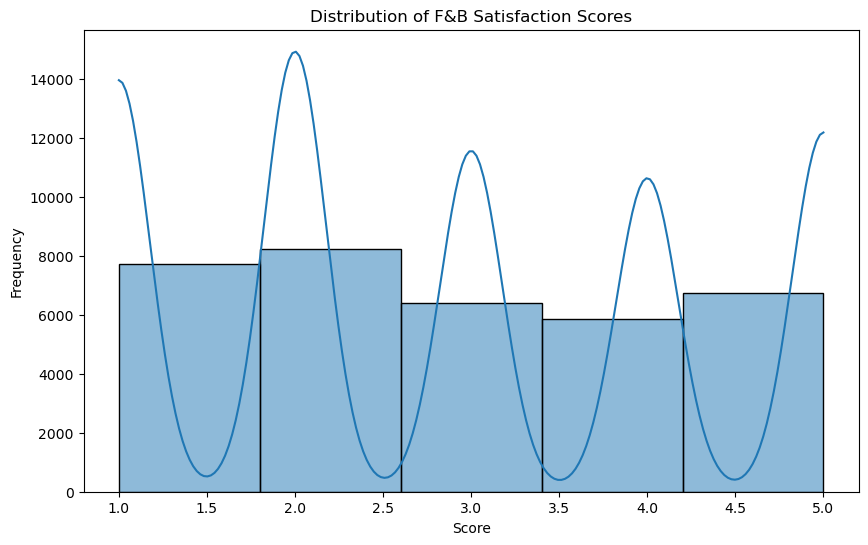

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(ss1['score'], bins=5, kde=True)
plt.title('Distribution of F&B Satisfaction Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

#hence it is evident that majority of people score 1,2 and 3 which means majority of them are unsatisfied.


C:\Users\Acer\AppData\Local\Temp\ipykernel_22724\2666741862.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ss1.corr()


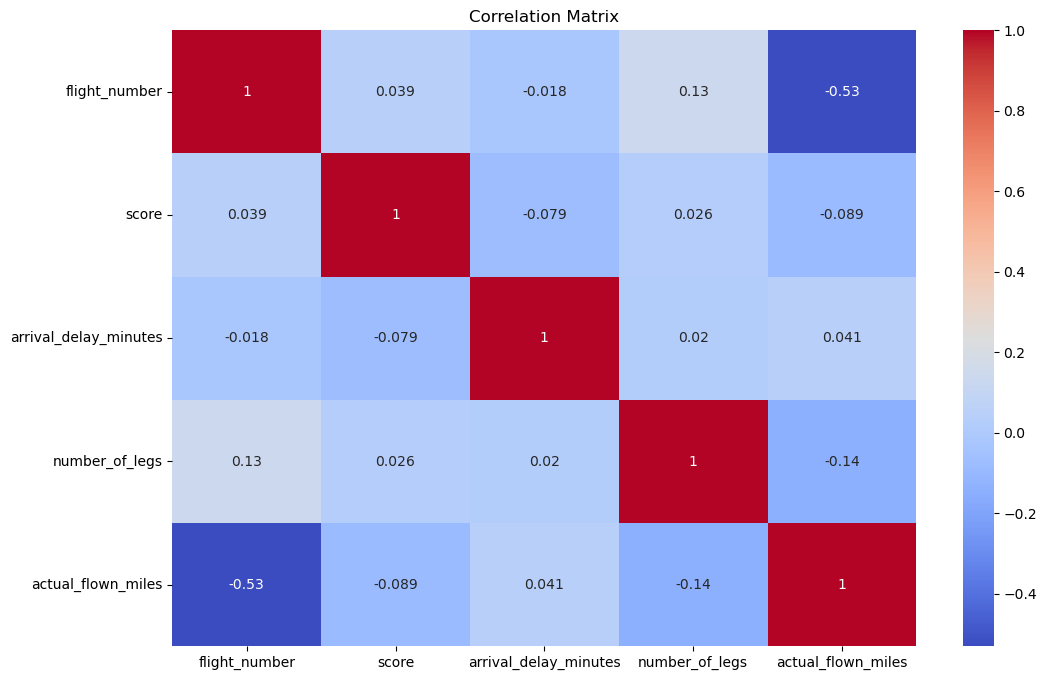

In [8]:
corr_matrix = ss1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# all the correlation are very weak and not significant enough to compare.


## Effect of Cabin Classes on Score

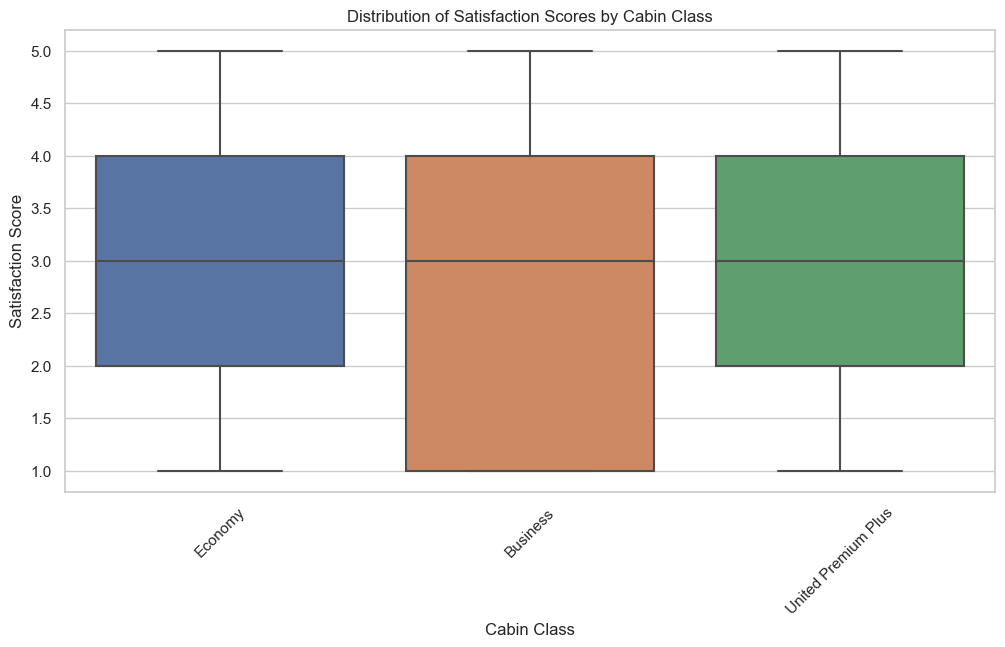

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='cabin_code_desc', y='score', data=ss1)
plt.xticks(rotation=45)  
plt.title('Distribution of Satisfaction Scores by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Satisfaction Score')
plt.show()

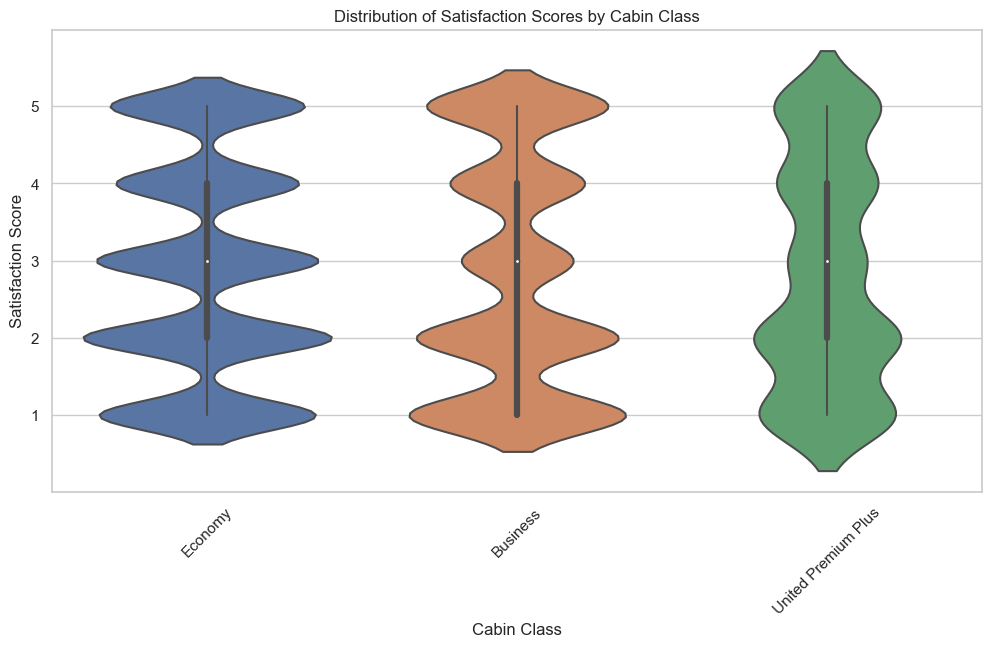

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.violinplot(x='cabin_code_desc', y='score', data=ss1)
plt.xticks(rotation=45)  
plt.title('Distribution of Satisfaction Scores by Cabin Class')
plt.xlabel('Cabin Class')
plt.ylabel('Satisfaction Score')
plt.show()


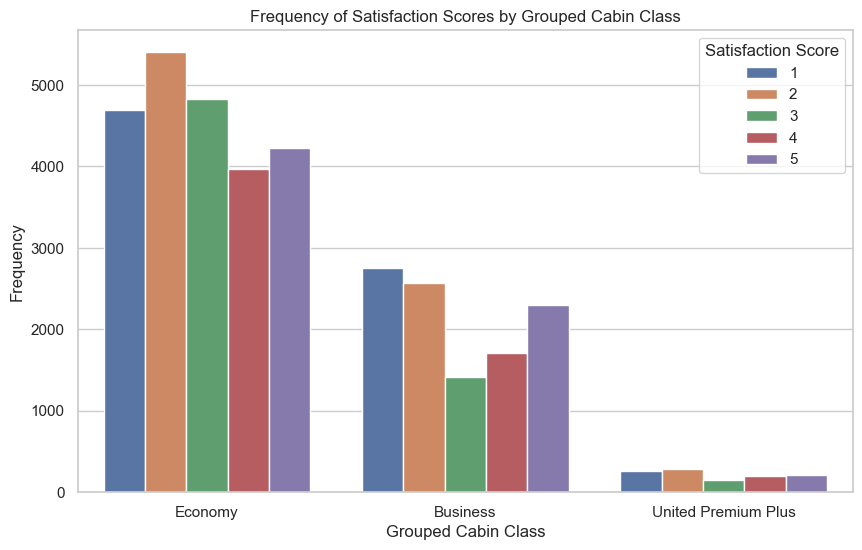

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def group_cabin_class(cabin_class):
    if cabin_class in ['Economy', 'Business', 'United Premium Plus']:
        return cabin_class
    else:
        return 'Other'

ss1['grouped_cabin_class'] = ss1['cabin_code_desc'].apply(group_cabin_class)

plt.figure(figsize=(10, 6))
sns.countplot(x='grouped_cabin_class', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Grouped Cabin Class')
plt.xlabel('Grouped Cabin Class')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


In [12]:
cabin_classes = ss1['cabin_code_desc'].unique()
for cabin_class in cabin_classes:
    subset = ss1[ss1['cabin_code_desc'] == cabin_class]
    unique_scores = subset['score'].unique()
    
    if len(unique_scores) <= 1:
        continue
    
    group1 = subset[subset['score'] == unique_scores[0]]['score']
    group2 = subset[subset['score'] == unique_scores[1]]['score']
    
    if np.var(group1) > 0 and np.var(group2) > 0:
        t_statistic, p_value = ttest_ind(group1, group2)
        print(f"Comparing {cabin_class}: t-statistic = {t_statistic:.2f}, p-value = {p_value:.4f}")
    else:
        print(f"Comparing {cabin_class}: Variance too low for t-test")
     
 #the satisfaction scores within these cabin classes are essentially the same, making it inappropriate to perform a statistical comparison.    

Comparing Economy: Variance too low for t-test
Comparing Business: Variance too low for t-test
Comparing United Premium Plus: Variance too low for t-test


In [13]:
# infligh satisfaction socre.
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('cabin_code_desc')['score'].count()
total_counts = ss1.groupby('cabin_code_desc')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100
for cabin_class, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {cabin_class}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for Business: 37.35%
Inflight Satisfaction Score for Economy: 35.45%
Inflight Satisfaction Score for United Premium Plus: 36.59%


### As scene the data for score on the basis of cabin class is very uniform to perform t-test. At the same time we can see that majority of passengers in all three classes are unsatisfied. The inflight satisfaction for all three classes are close.

## Effect of Haul Type on Score

In [14]:
ss1['haul_type'].value_counts()

Medium    21042
Long       9711
Short      4210
Name: haul_type, dtype: int64

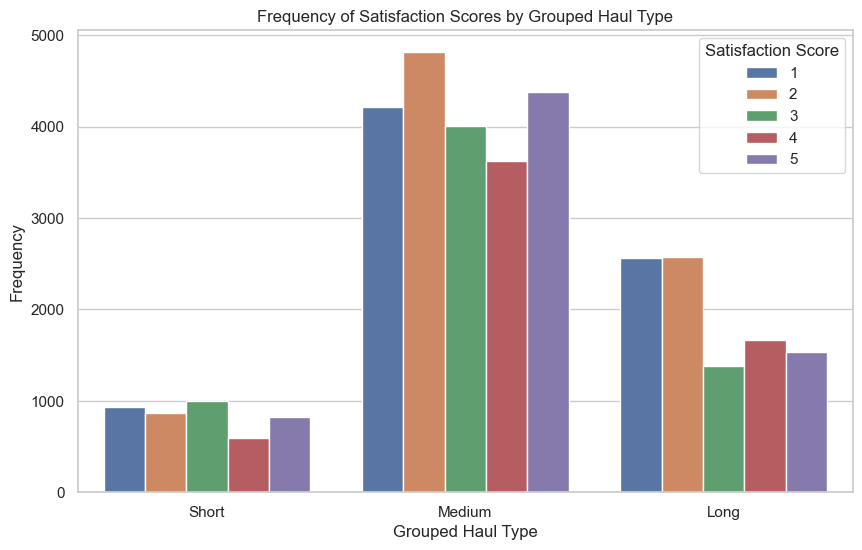

In [15]:
sns.set(style="whitegrid")

def group_haul_type(haul_type):
    if haul_type in ['Short', 'Medium', 'Long']:
        return haul_type
    else:
        return 'Other'

ss1['grouped_haul_type'] = ss1['haul_type'].apply(group_haul_type)

plt.figure(figsize=(10, 6))
sns.countplot(x='grouped_haul_type', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Grouped Haul Type')
plt.xlabel('Grouped Haul Type')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()

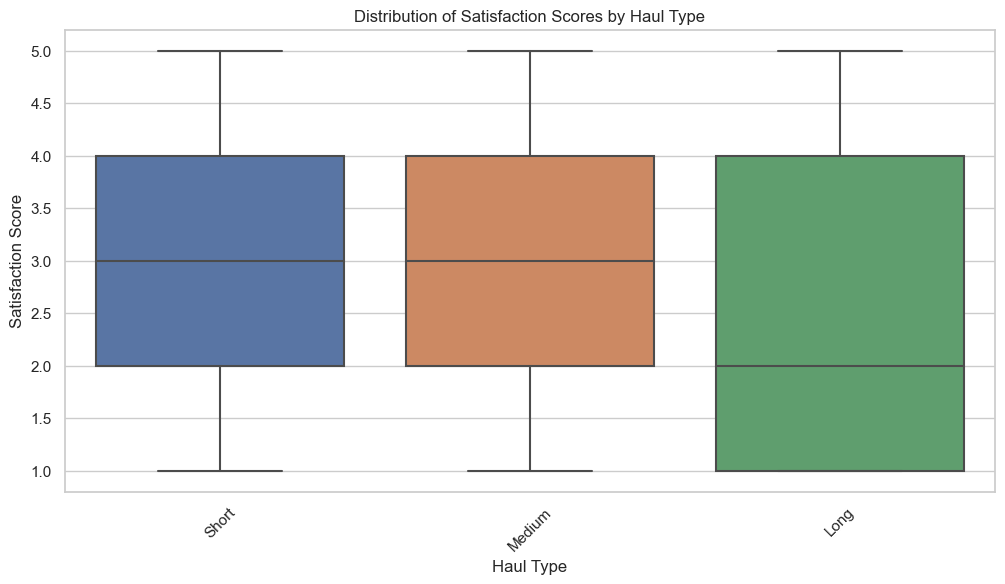

In [16]:
#destribution of scores
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x='haul_type', y='score', data=ss1)
plt.xticks(rotation=45)
plt.title('Distribution of Satisfaction Scores by Haul Type')
plt.xlabel('Haul Type')
plt.ylabel('Satisfaction Score')
plt.show()


In [17]:
from scipy.stats import f_oneway

short_scores = ss1[ss1['haul_type'] == 'Short']['score']
medium_scores = ss1[ss1['haul_type'] == 'Medium']['score']
long_scores = ss1[ss1['haul_type'] == 'Long']['score']

f_statistic, p_value = f_oneway(short_scores, medium_scores, long_scores)

print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")


ANOVA results: F-statistic = 114.68, p-value = 0.0000


In [18]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

haul_types = ss1['haul_type'].unique()
groups = [ss1[ss1['haul_type'] == haul]['score'] for haul in haul_types]
f_statistic, p_value = f_oneway(*groups)

tukey_result = pairwise_tukeyhsd(np.concatenate(groups), np.repeat(haul_types, [len(group) for group in groups]))

print("ANOVA results: F-statistic =", f_statistic, "p-value =", p_value)
print("Tukey's HSD results:")
print(tukey_result)

ANOVA results: F-statistic = 114.68042357854482 p-value = 2.2781954785764227e-50
Tukey's HSD results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  Long Medium   0.2645    0.0  0.2236  0.3055   True
  Long  Short   0.1904    0.0  0.1288   0.252   True
Medium  Short  -0.0741 0.0058 -0.1305 -0.0178   True
----------------------------------------------------


In [19]:
satisfied_counts_haul = ss1[ss1['score'].isin([4, 5])].groupby('haul_type')['score'].count()
total_counts_haul = ss1.groupby('haul_type')['score'].count()
satisfaction_scores_haul = (satisfied_counts_haul / total_counts_haul) * 100
for haul_type, satisfaction_score in satisfaction_scores_haul.items():
    print(f"Inflight Satisfaction Score for {haul_type}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for Long: 32.87%
Inflight Satisfaction Score for Medium: 38.03%
Inflight Satisfaction Score for Short: 33.61%


### The analysis indicates that the length or duration of the flight (haul type) has an impact on passenger satisfaction. Passengers' satisfaction levels tend to differ significantly depending on whether they are on short, medium, or long haul flights.
### As seen the null hypothesis is reject for all three pairs and so the difference is analytically significant.
### The satisfaction is maximum in case of Medium flights.

## Arrival Delay Time Analysis with Satisfaction Score.

In [20]:
ss1['arrival_delay_minutes'].describe()

count    34963.000000
mean        -1.572090
std         38.173459
min       -104.000000
25%        -19.000000
50%         -9.000000
75%          4.000000
max        907.000000
Name: arrival_delay_minutes, dtype: float64

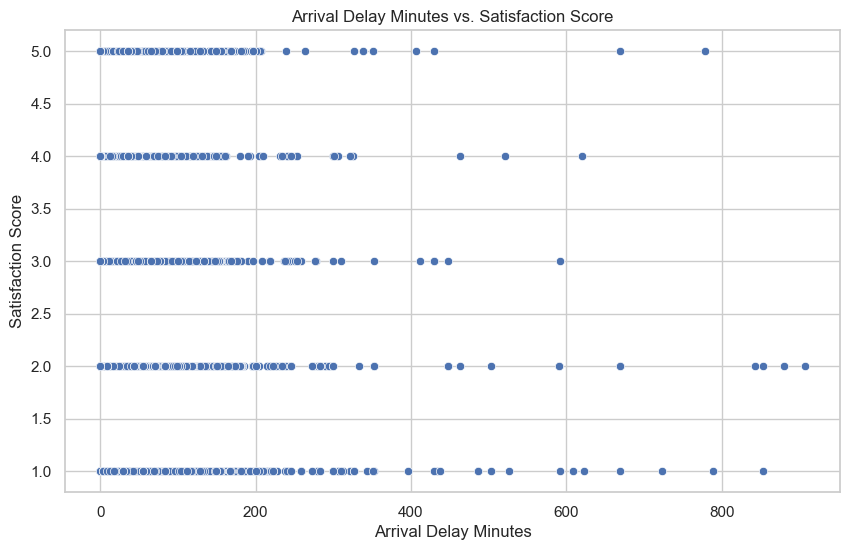

In [21]:
ss1['arrival_delay_minutes'] = ss1['arrival_delay_minutes'].apply(lambda x: max(0, x))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='arrival_delay_minutes', y='score', data=ss1)
plt.title('Arrival Delay Minutes vs. Satisfaction Score')
plt.xlabel('Arrival Delay Minutes')
plt.ylabel('Satisfaction Score')
plt.show()

<Figure size 1000x1000 with 0 Axes>

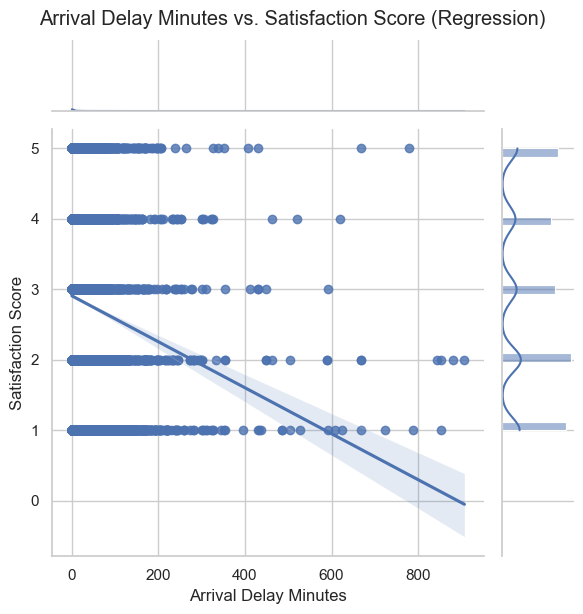

In [22]:
plt.figure(figsize=(10, 10))
sns.jointplot(x='arrival_delay_minutes', y='score', data=ss1, kind='reg')
plt.xlabel('Arrival Delay Minutes')
plt.ylabel('Satisfaction Score')
plt.tight_layout() 
plt.suptitle('Arrival Delay Minutes vs. Satisfaction Score (Regression)', y=1.02)
plt.show()


In [23]:
correlation = ss1['arrival_delay_minutes'].corr(ss1['score'])
print(f"Correlation between Arrival Delay Minutes and Satisfaction Score: {correlation:.2f}")



Correlation between Arrival Delay Minutes and Satisfaction Score: -0.08


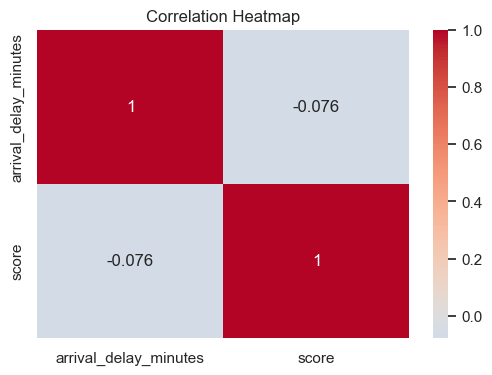

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ss1[['arrival_delay_minutes', 'score']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


### As can be seen from the regression grpah and correlation that the score and delay time are inversely related but the correlation is very weak and hence cant be considered as a key driver of the score.

## Entity analysis with Score

In [25]:
ss1['entity'].value_counts()

Domestic    23853
Atlantic     7627
Latin        2547
Pacific       933
Name: entity, dtype: int64

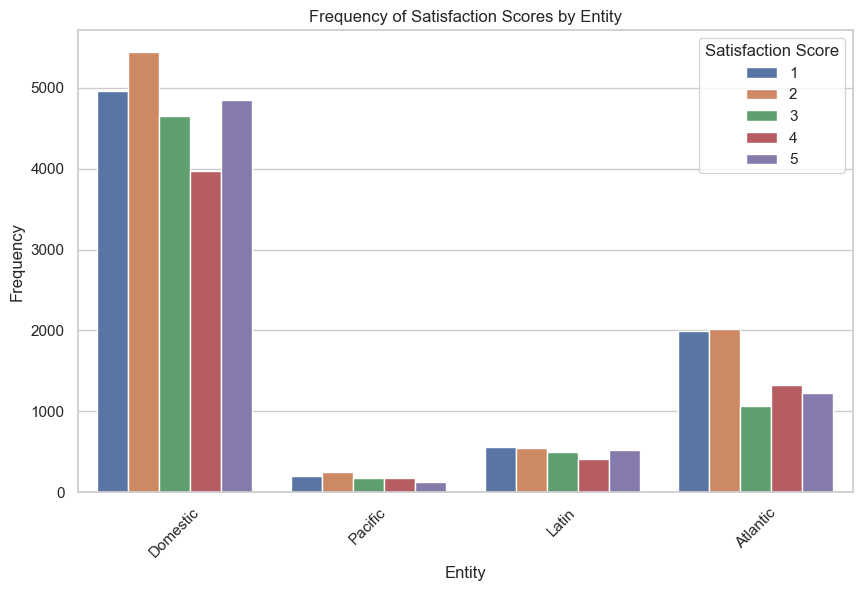

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='entity', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Entity')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.legend(title='Satisfaction Score')
plt.show()


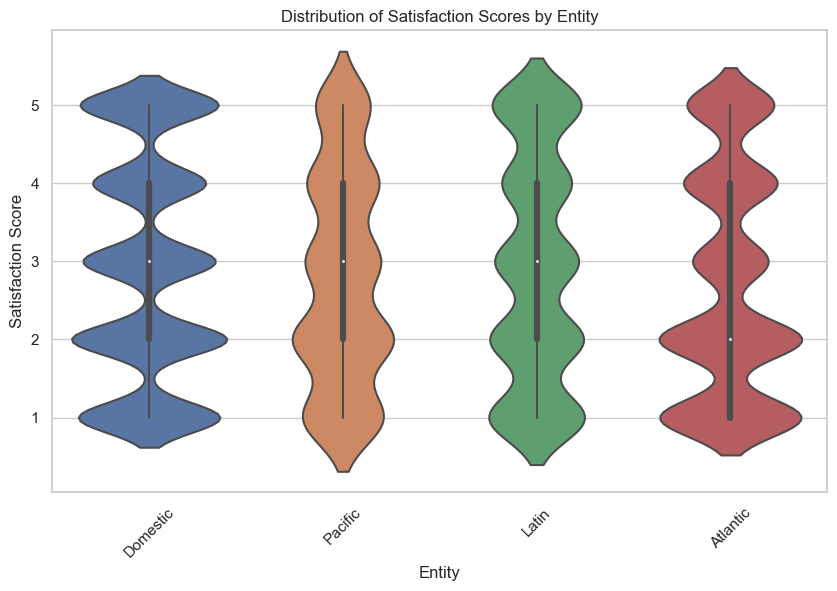

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='entity', y='score', data=ss1)
plt.title('Distribution of Satisfaction Scores by Entity')
plt.xlabel('Entity')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


In [28]:
import scipy.stats as stats

entities = ss1['entity'].unique()
valid_entities = [entity for entity in entities if ss1[ss1['entity'] == entity]['score'].count() > 1]

anova_results = stats.f_oneway(*(ss1[ss1['entity'] == entity]['score'] for entity in valid_entities))

print("ANOVA results:")
print(f"F-statistic = {anova_results.statistic:.2f}, p-value = {anova_results.pvalue:.4f}")


ANOVA results:
F-statistic = 47.87, p-value = 0.0000


In [29]:
satisfied_counts_entity = ss1[ss1['score'].isin([4, 5])].groupby('entity')['score'].count()
total_counts_entity = ss1.groupby('entity')['score'].count()
satisfaction_scores_entity = (satisfied_counts_entity / total_counts_entity) * 100

for entity, satisfaction_score in satisfaction_scores_entity.items():
    print(f"Inflight Satisfaction Score for {entity}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for Atlantic: 33.46%
Inflight Satisfaction Score for Domestic: 36.95%
Inflight Satisfaction Score for Latin: 36.75%
Inflight Satisfaction Score for Pacific: 33.01%


### Based on the results of the ANOVA test, it appears that the satisfaction score depends on the entity. The significant p-value from the ANOVA suggests that there are statistically significant differences in satisfaction scores among the different entities. 
### Not substantial difference in inflight satisfaction score, but people are most satisfied in Domestic Flights.
## Number of Legs Analysis with Score.

In [30]:
ss1['number_of_legs'].value_counts()

1    22885
2    11573
3      505
Name: number_of_legs, dtype: int64

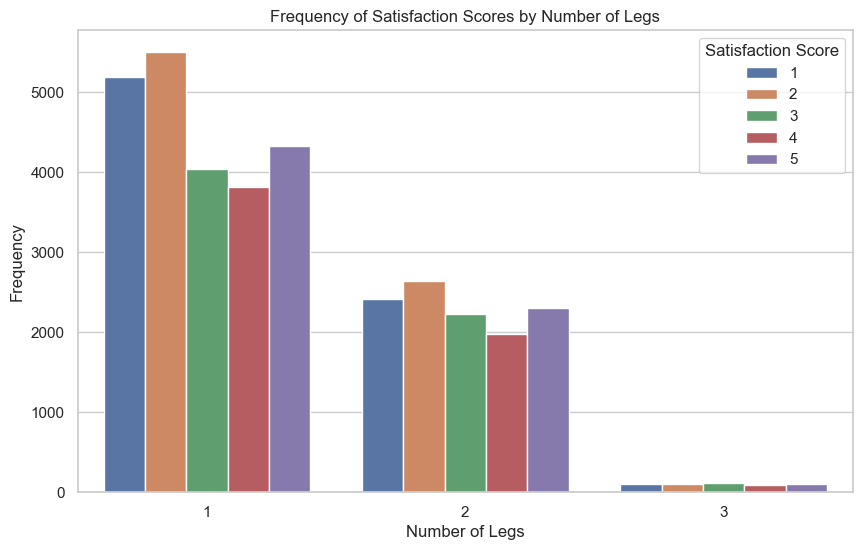

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='number_of_legs', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Number of Legs')
plt.xlabel('Number of Legs')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


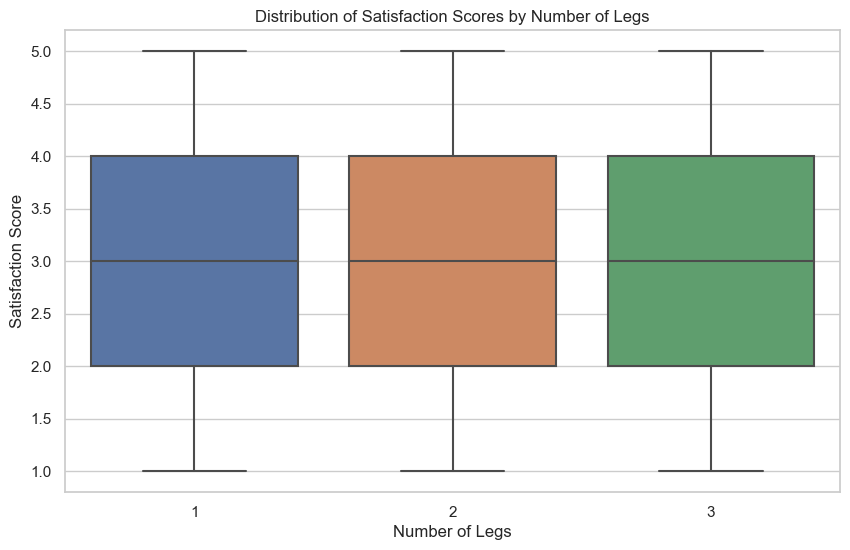

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='number_of_legs', y='score', data=ss1)
plt.title('Distribution of Satisfaction Scores by Number of Legs')
plt.xlabel('Number of Legs')
plt.ylabel('Satisfaction Score')
plt.show()


In [33]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    ss1[ss1['number_of_legs'] == 1]['score'],
    ss1[ss1['number_of_legs'] == 2]['score'],
    ss1[ss1['number_of_legs'] == 3]['score']
)

print("ANOVA results: F-statistic =", anova_result.statistic, "p-value =", anova_result.pvalue)


ANOVA results: F-statistic = 11.927948643807628 p-value = 6.630165341178946e-06


In [34]:
satisfaction_scores = []

for legs in [1, 2, 3]:
    satisfied_counts = ss1[ss1['number_of_legs'] == legs]['score'].isin([4, 5]).sum()
    total_counts = ss1[ss1['number_of_legs'] == legs]['score'].count()
    satisfaction_score = (satisfied_counts / total_counts) * 100
    satisfaction_scores.append(satisfaction_score)

for i, legs in enumerate([1, 2, 3]):
    print(f"Inflight Satisfaction Score for number_of_legs = {legs}: {satisfaction_scores[i]:.2f}%")


Inflight Satisfaction Score for number_of_legs = 1: 35.57%
Inflight Satisfaction Score for number_of_legs = 2: 36.94%
Inflight Satisfaction Score for number_of_legs = 3: 38.61%


### As can be seen the p-value is very close to 0, therese the null hypothesis is rejected and since the difference is significant, therefor legs does affect the scores.
### The inflight satisfaction socre are almost same.
### People seem to be more satisfied with two legs as compared to single leg flights.


## Loyalty program analysis with Score.

In [35]:
ss1['loyalty_program_level'].value_counts()

non-elite           24086
premier silver       3380
premier 1k           2816
premier gold         2337
premier platinum     1774
global services       567
NBK                     3
Name: loyalty_program_level, dtype: int64

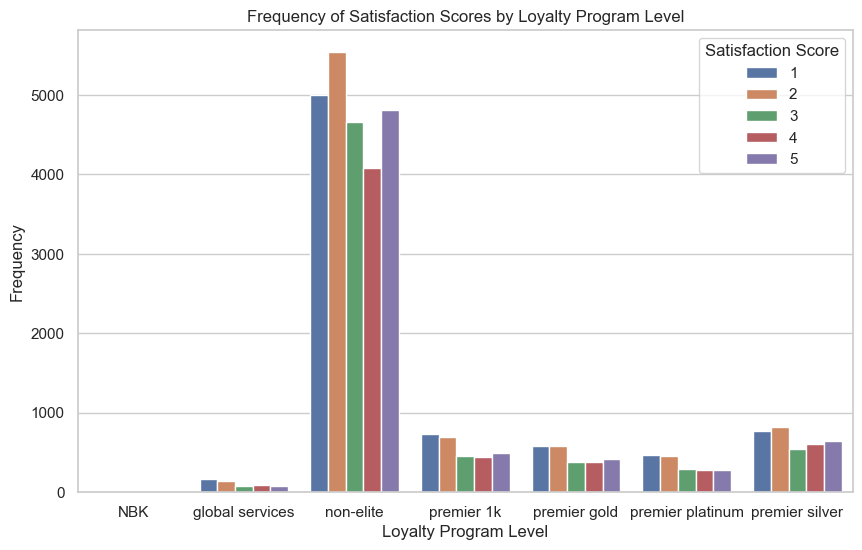

In [36]:
sns.set(style="whitegrid")

plot_data = ss1.groupby(['loyalty_program_level', 'score']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_program_level', y='count', hue='score', data=plot_data)
plt.title('Frequency of Satisfaction Scores by Loyalty Program Level')
plt.xlabel('Loyalty Program Level')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()

In [37]:
loyalty_levels = ss1['loyalty_program_level'].unique()
data_by_level = [ss1[ss1['loyalty_program_level'] == level]['score'] for level in loyalty_levels]

f_statistic, p_value = stats.f_oneway(*data_by_level)
print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")

ANOVA results: F-statistic = 19.57, p-value = 0.0000


In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(ss1['score'], ss1['loyalty_program_level'], alpha=0.05)
print(tukey_results)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
             NBK  global services  -0.0705    1.0 -2.5054  2.3643  False
             NBK        non-elite   0.2578 0.9999 -2.1707  2.6864  False
             NBK       premier 1k   0.0769    1.0 -2.3528  2.5066  False
             NBK     premier gold   0.0988    1.0 -2.3311  2.5288  False
             NBK premier platinum   0.0267    1.0 -2.4038  2.4571  False
             NBK   premier silver   0.1943    1.0 -2.2352  2.6238  False
 global services        non-elite   0.3284    0.0  0.1497  0.5071   True
 global services       premier 1k   0.1475 0.2709 -0.0461  0.3411  False
 global services     premier gold   0.1694 0.1463 -0.0275  0.3663  False
 global services premier platinum   0.0972 0.7952 -0.1057  0.3001  False
 global services   premier silver   0.2648 0.0009  

In [39]:
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('loyalty_program_level')['score'].count()
total_counts = ss1.groupby('loyalty_program_level')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100
for loyalty_level, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {loyalty_level}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for NBK: 33.33%
Inflight Satisfaction Score for global services: 31.39%
Inflight Satisfaction Score for non-elite: 36.94%
Inflight Satisfaction Score for premier 1k: 33.24%
Inflight Satisfaction Score for premier gold: 33.80%
Inflight Satisfaction Score for premier platinum: 31.68%
Inflight Satisfaction Score for premier silver: 36.83%


### Based on the Tukey's HSD test results, we can infer that the "loyalty_program_level" significantly affects the satisfaction score. Specifically:

- Passengers with the "non-elite" loyalty program level tend to have different satisfaction scores compared to passengers with other loyalty program levels, including "global services," "premier 1k," "premier gold," "premier platinum," and "premier silver."

- Passengers with the "global services" loyalty program level have a different satisfaction score compared to passengers with the "premier silver" loyalty program level.

- Passengers with the "premier 1k," "premier gold," "premier platinum," and "premier silver" loyalty program levels also have different satisfaction scores from each other.

### In summary, the loyalty program level appears to be a significant factor affecting passenger satisfaction scores. Different loyalty program levels lead to varying levels of satisfaction among passengers.

## Generation Analysis With Score

In [40]:
ss1['generation'].value_counts()

Boomer        16367
Gen X         11088
Millennial     4979
Silent         1697
Gen Z           827
NBK               3
Greatest          2
Name: generation, dtype: int64

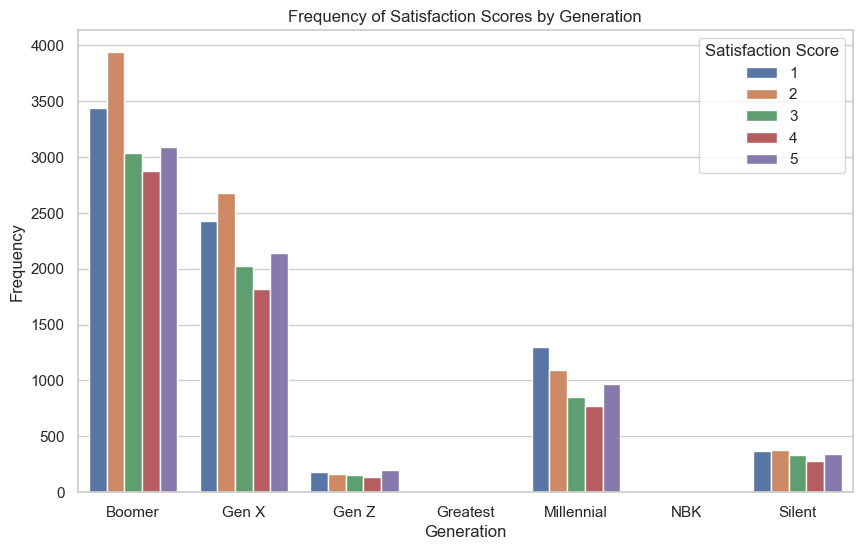

In [41]:
sns.set(style="whitegrid")

plot_data = ss1.groupby(['generation', 'score']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='generation', y='count', hue='score', data=plot_data)
plt.title('Frequency of Satisfaction Scores by Generation')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


In [42]:
generation_levels = ss1['generation'].unique()
data_by_level = [ss1[ss1['generation'] == level]['score'] for level in generation_levels]

f_statistic, p_value = stats.f_oneway(*data_by_level)
print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")


ANOVA results: F-statistic = 4.69, p-value = 0.0001


In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(ss1['score'], ss1['generation'])
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    Boomer      Gen X  -0.0216 0.8826 -0.0734  0.0302  False
    Boomer      Gen Z   0.1174  0.241 -0.0327  0.2675  False
    Boomer   Greatest  -1.8923 0.4981 -4.8704  1.0859  False
    Boomer Millennial  -0.0917 0.0014 -0.1599 -0.0236   True
    Boomer        NBK  -0.2256    1.0 -2.6573  2.2061  False
    Boomer     Silent   0.0217  0.997 -0.0857  0.1291  False
     Gen X      Gen Z    0.139 0.0983 -0.0128  0.2908  False
     Gen X   Greatest  -1.8707 0.5126 -4.8489  1.1076  False
     Gen X Millennial  -0.0701 0.0612  -0.142  0.0017  False
     Gen X        NBK   -0.204    1.0 -2.6358  2.2278  False
     Gen X     Silent   0.0433  0.908 -0.0665  0.1531  False
     Gen Z   Greatest  -2.0097 0.4227 -4.9912  0.9719  False
     Gen Z Millennial  -0.2091 0.0019 -0.3673  -0.051   True
     Gen Z        NBK   

In [44]:
generation_scores = ss1.groupby('generation')['score'].value_counts(normalize=True).unstack().fillna(0)
generation_scores['Inflight Satisfaction Score'] = (generation_scores[4] + generation_scores[5]) * 100

for generation, score in generation_scores.iterrows():
    print(f"{generation}: Inflight Satisfaction Score: {score['Inflight Satisfaction Score']:.2f}%")


Boomer: Inflight Satisfaction Score: 36.41%
Gen X: Inflight Satisfaction Score: 35.73%
Gen Z: Inflight Satisfaction Score: 40.15%
Greatest: Inflight Satisfaction Score: 0.00%
Millennial: Inflight Satisfaction Score: 34.85%
NBK: Inflight Satisfaction Score: 33.33%
Silent: Inflight Satisfaction Score: 36.59%


### Based on the Tukey's HSD test results for the generation column and satisfaction scores, here are the conclusions we can draw:

- There is a significant difference in satisfaction scores between the "Boomer" and "Millennial" generations. The mean satisfaction score for the "Millennial" generation is significantly lower than that of the "Boomer" generation.
- There is a significant difference in satisfaction scores between the "Gen Z" and "Millennial" generations. The mean satisfaction score for the "Millennial" generation is significantly lower than that of the "Gen Z" generation.
- Other pairwise comparisons between generations do not show significant differences in satisfaction scores.
### In summary, the Tukey's HSD test indicates that satisfaction scores vary significantly between specific pairs of generations. Specifically, the "Millennial" generation tends to have lower satisfaction scores compared to the "Boomer" and "Gen Z" generations in your dataset.

## Fleet Usage Analysis with Score

In [45]:
ss1['fleet_usage'].value_counts()

Mainline    29868
Express      5095
Name: fleet_usage, dtype: int64

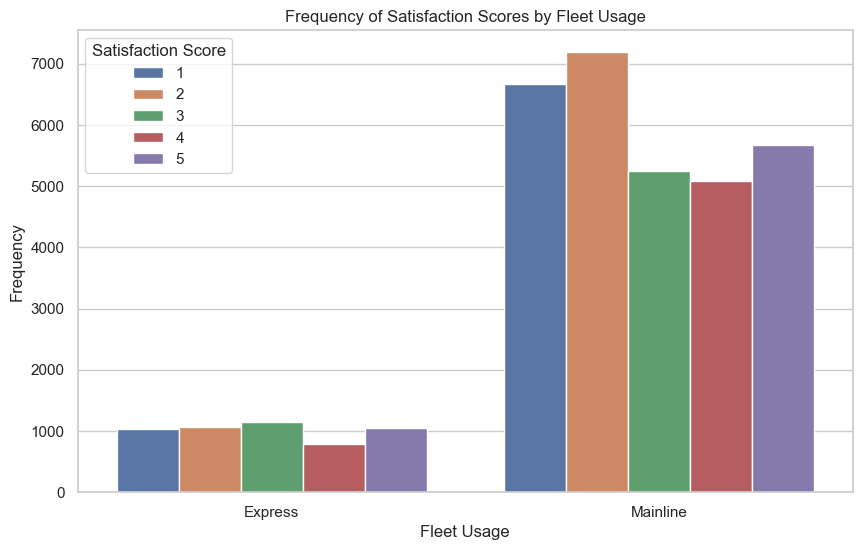

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='fleet_usage', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Fleet Usage')
plt.xlabel('Fleet Usage')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


In [47]:
from scipy import stats

mainline_scores = ss1[ss1['fleet_usage'] == 'Mainline']['score']
express_scores = ss1[ss1['fleet_usage'] == 'Express']['score']

t_statistic, p_value = stats.ttest_ind(mainline_scores, express_scores, equal_var=False)
print(f"T-test results: t-statistic = {t_statistic:.2f}, p-value = {p_value:.4f}")


T-test results: t-statistic = -4.23, p-value = 0.0000


In [48]:
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('fleet_usage')['score'].count()
total_counts = ss1.groupby('fleet_usage')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100

for fleet_usage, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {fleet_usage}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for Express: 36.23%
Inflight Satisfaction Score for Mainline: 36.04%


### There is a significant difference in satisfaction scores between the two fleet usage categories but the overall inflight satisfaction score are equal.
## Actual Flown Miles analysis with Score

In [49]:
ss1['actual_flown_miles'].describe()

count    34963.000000
mean      2198.748162
std       1794.300235
min         45.000000
25%        817.000000
50%       1561.000000
75%       3414.000000
max       8440.000000
Name: actual_flown_miles, dtype: float64

<Figure size 1000x1000 with 0 Axes>

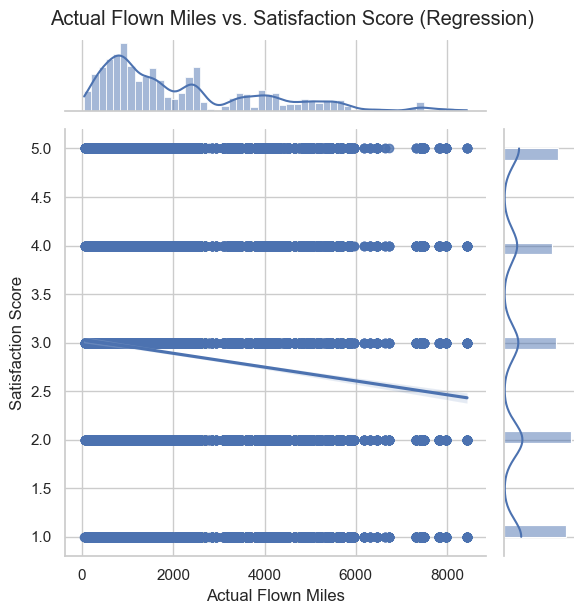

In [50]:
plt.figure(figsize=(10, 10))
sns.jointplot(x='actual_flown_miles', y='score', data=ss1, kind='reg')
plt.xlabel('Actual Flown Miles')
plt.ylabel('Satisfaction Score')
plt.tight_layout()
plt.suptitle('Actual Flown Miles vs. Satisfaction Score (Regression)', y=1.02)
plt.show()


In [51]:
correlation = ss1['actual_flown_miles'].corr(ss1['score'])
print(f"Correlation between Actual Flown Miles and Satisfaction Score: {correlation:.2f}")


Correlation between Actual Flown Miles and Satisfaction Score: -0.09


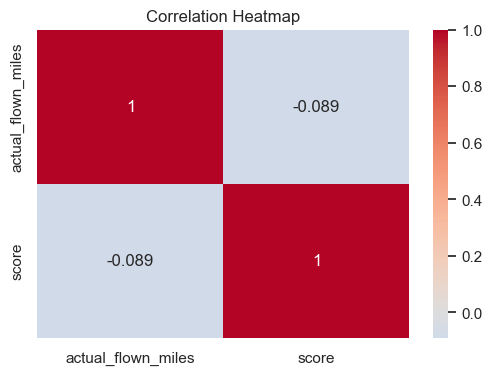

In [52]:
correlation_matrix = ss1[['actual_flown_miles', 'score']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


### As can be seen from the regression grpah and correlation that the score and actual flown miles are inversely related but the correlation is very weak and hence cant be considered as a key driver of the score.

## Response Group Analysis with Score

In [53]:
ss1['response_group'].value_counts()

member        25526
non-member     9434
NBK               3
Name: response_group, dtype: int64

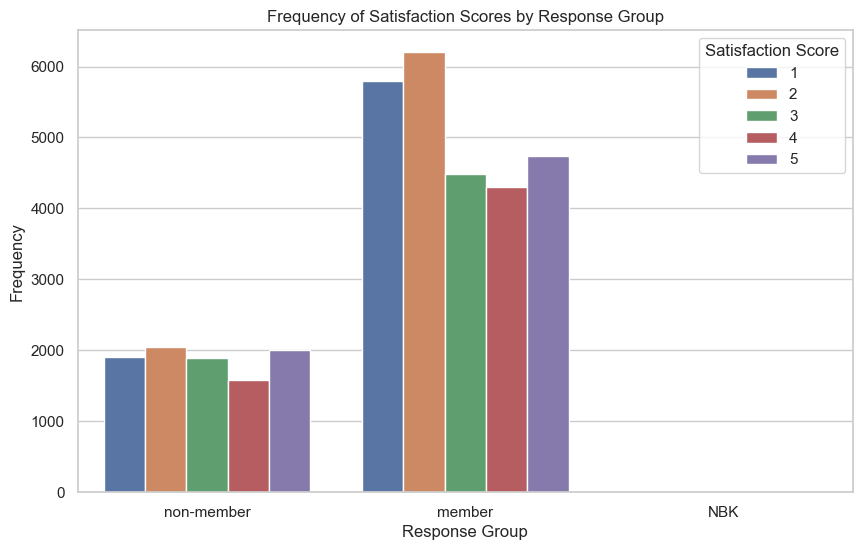

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='response_group', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Response Group')
plt.xlabel('Response Group')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


In [55]:
member_scores = ss1[ss1['response_group'] == 'member']['score']
non_member_scores = ss1[ss1['response_group'] == 'non-member']['score']

t_statistic, p_value = stats.ttest_ind(member_scores, non_member_scores, equal_var=False)
print(f"T-test results for Response Group (Member vs Non-Member): t-statistic = {t_statistic:.2f}, p-value = {p_value:.4f}")


T-test results for Response Group (Member vs Non-Member): t-statistic = -7.35, p-value = 0.0000


In [56]:
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('response_group')['score'].count()
total_counts = ss1.groupby('response_group')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100

for response_group, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {response_group}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for NBK: 33.33%
Inflight Satisfaction Score for member: 35.39%
Inflight Satisfaction Score for non-member: 37.91%


### There is a significant difference in satisfaction scores between the member and non-member categories but the overall inflight satisfaction score are equal.

## Media Provider analysis with Score.

In [57]:
ss1['media_provider'].value_counts()

PANASONIC        16615
THALES           10160
GOGO              3561
VIASAT            3093
Not-specified     1534
Name: media_provider, dtype: int64

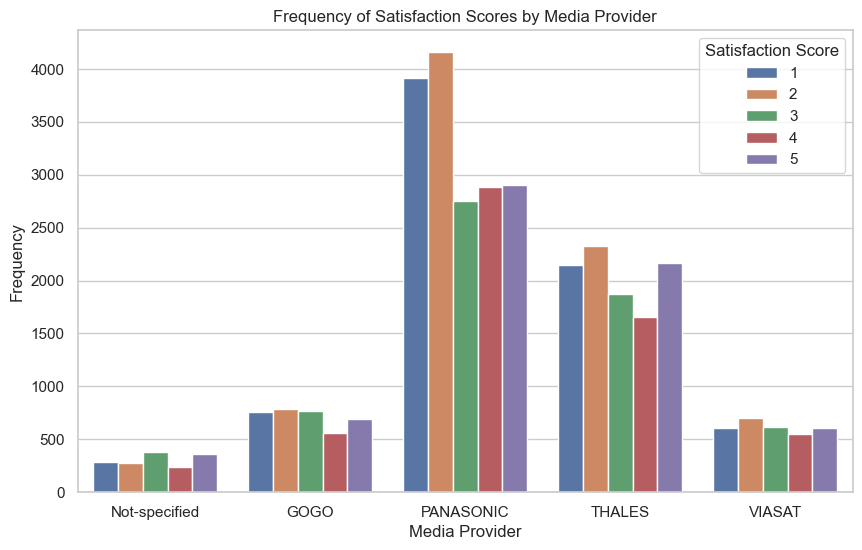

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='media_provider', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Media Provider')
plt.xlabel('Media Provider')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


In [59]:
import scipy.stats as stats

media_providers = ss1['media_provider'].unique()
data_by_provider = [ss1[ss1['media_provider'] == provider]['score'] for provider in media_providers]

f_statistic, p_value = stats.f_oneway(*data_by_provider)
print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")


ANOVA results: F-statistic = 25.99, p-value = 0.0000


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

media_provider_scores = [ss1[ss1['media_provider'] == provider]['score'] for provider in media_providers]

tukey_result = pairwise_tukeyhsd(np.concatenate(media_provider_scores), np.repeat(media_providers, [len(scores) for scores in media_provider_scores]))

print("Tukey's HSD results:")
print(tukey_result)


Tukey's HSD results:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
         GOGO Not-specified   0.1763 0.0005  0.0575  0.2952   True
         GOGO     PANASONIC  -0.0993 0.0015 -0.1712 -0.0275   True
         GOGO        THALES   0.0362  0.689 -0.0396   0.112  False
         GOGO        VIASAT   0.0499  0.612 -0.0457  0.1456  False
Not-specified     PANASONIC  -0.2757    0.0 -0.3795 -0.1718   True
Not-specified        THALES  -0.1401 0.0031 -0.2467 -0.0335   True
Not-specified        VIASAT  -0.1264 0.0368 -0.2479 -0.0048   True
    PANASONIC        THALES   0.1355    0.0  0.0865  0.1846   True
    PANASONIC        VIASAT   0.1493    0.0  0.0731  0.2255   True
       THALES        VIASAT   0.0137 0.9902 -0.0662  0.0937  False
------------------------------------------------------------------


In [61]:
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('media_provider')['score'].count()
total_counts = ss1.groupby('media_provider')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100

for media_provider, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {media_provider}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for GOGO: 35.07%
Inflight Satisfaction Score for Not-specified: 38.92%
Inflight Satisfaction Score for PANASONIC: 34.84%
Inflight Satisfaction Score for THALES: 37.56%
Inflight Satisfaction Score for VIASAT: 37.50%


### Based on the Tukey's HSD results for media providers and satisfaction scores:

- GOGO has significantly higher satisfaction scores compared to Not-specified and PANASONIC.
- GOGO has significantly lower satisfaction scores compared to THALES.
- There is no significant difference in satisfaction scores between GOGO and VIASAT.
- Not-specified has significantly lower satisfaction scores compared to PANASONIC and THALES.
- Not-specified has no significant difference in satisfaction scores compared to VIASAT.
- PANASONIC has significantly higher satisfaction scores compared to THALES and VIASAT.
- THALES and VIASAT have no significant difference in satisfaction scores.

### In summary, GOGO tends to have higher satisfaction scores compared to Not-specified and PANASONIC, while it has lower scores compared to THALES. Not-specified and PANASONIC also have differences in scores. THALES has higher scores compared to VIASAT, but there is no significant difference between THALES and VIASAT.
### The inflight satisfaction score are similar but people are most satisfied with Thales and Viasat.

## Hub-Spoke Analysis with Score.

In [62]:
ss1['hub_spoke'].value_counts()

hub departure      18302
spoke departure    16661
Name: hub_spoke, dtype: int64

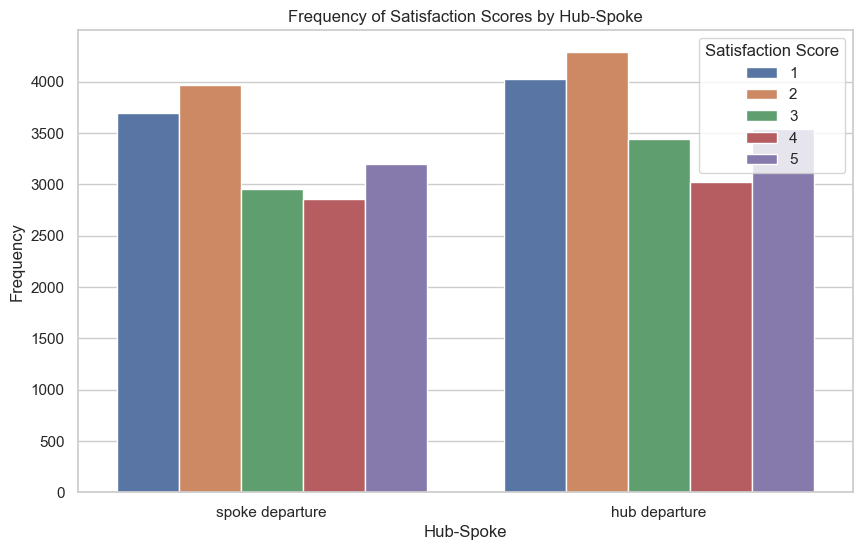

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='hub_spoke', hue='score', data=ss1)
plt.title('Frequency of Satisfaction Scores by Hub-Spoke')
plt.xlabel('Hub-Spoke')
plt.ylabel('Frequency')
plt.legend(title='Satisfaction Score')
plt.show()


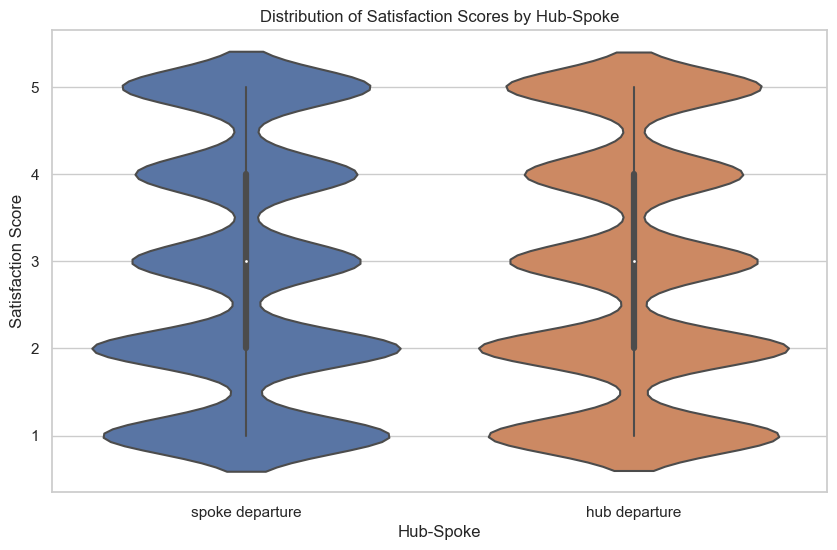

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='hub_spoke', y='score', data=ss1)
plt.title('Distribution of Satisfaction Scores by Hub-Spoke')
plt.xlabel('Hub-Spoke')
plt.ylabel('Satisfaction Score')
plt.show()


In [65]:
from scipy import stats

hub_scores = ss1[ss1['hub_spoke'] == 'hub departure']['score']
spoke_scores = ss1[ss1['hub_spoke'] == 'spoke departure']['score']

t_statistic, p_value = stats.ttest_ind(hub_scores, spoke_scores, equal_var=False)
print(f"T-test results: t-statistic = {t_statistic:.2f}, p-value = {p_value:.4f}")


T-test results: t-statistic = 0.22, p-value = 0.8269


In [66]:
satisfied_counts = ss1[ss1['score'].isin([4, 5])].groupby('hub_spoke')['score'].count()
total_counts = ss1.groupby('hub_spoke')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100

for hub_spoke, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {hub_spoke}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for hub departure: 35.82%
Inflight Satisfaction Score for spoke departure: 36.34%


### The t-test results you provided indicate that the t-statistic is approximately 0.22 and the p-value is 0.8269. The p-value is higher than the conventional significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis, which in this case could be that the mean satisfaction scores between the "hub departure" and "spoke departure" groups are not significantly different. 
### Therefore there is no significant influence of Hub-Spoke on Score.

## Analysis of Inflight Satisfaction Score for Flight Number, Origin of Flight and Destination of Flight


In [67]:
ss1['flight_number'].value_counts()

219     114
985     104
42      104
86      100
363      87
       ... 
3511      1
4731      1
3561      1
5426      1
1550      1
Name: flight_number, Length: 4058, dtype: int64

In [68]:
ss1['flight_number'].value_counts().describe()

count    4058.000000
mean        8.615821
std        10.951931
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       114.000000
Name: flight_number, dtype: float64

In [69]:
flight_number_counts = ss1['flight_number'].value_counts()
min_occurrences = 10
filtered_data = ss1[ss1['flight_number'].isin(flight_number_counts[flight_number_counts >= min_occurrences].index)]
print(filtered_data['flight_number'].value_counts())
print(filtered_data['flight_number'].describe())


219     114
985     104
42      104
86      100
363      87
       ... 
1558     10
657      10
2147     10
1940     10
2247     10
Name: flight_number, Length: 1147, dtype: int64
count    23647.000000
mean      1104.454730
std        849.164348
min          2.000000
25%        386.000000
50%        961.000000
75%       1732.000000
max       6363.000000
Name: flight_number, dtype: float64


In [70]:
satisfied_counts = filtered_data[filtered_data['score'].isin([4, 5])].groupby('flight_number')['score'].count()
total_counts = filtered_data.groupby('flight_number')['score'].count()
satisfaction_percentages = (satisfied_counts / total_counts) * 100

flight_number_ssp = pd.DataFrame({
    'Flight Number': satisfaction_percentages.index,
    'Satisfaction Percentage': satisfaction_percentages.values
})

print(flight_number_ssp)


      Flight Number  Satisfaction Percentage
0                 2                23.529412
1                 3                25.000000
2                 4                20.689655
3                 5                35.937500
4                 6                21.153846
...             ...                      ...
1142           5627                30.000000
1143           5940                36.363636
1144           6061                40.000000
1145           6137                36.363636
1146           6363                36.363636

[1147 rows x 2 columns]


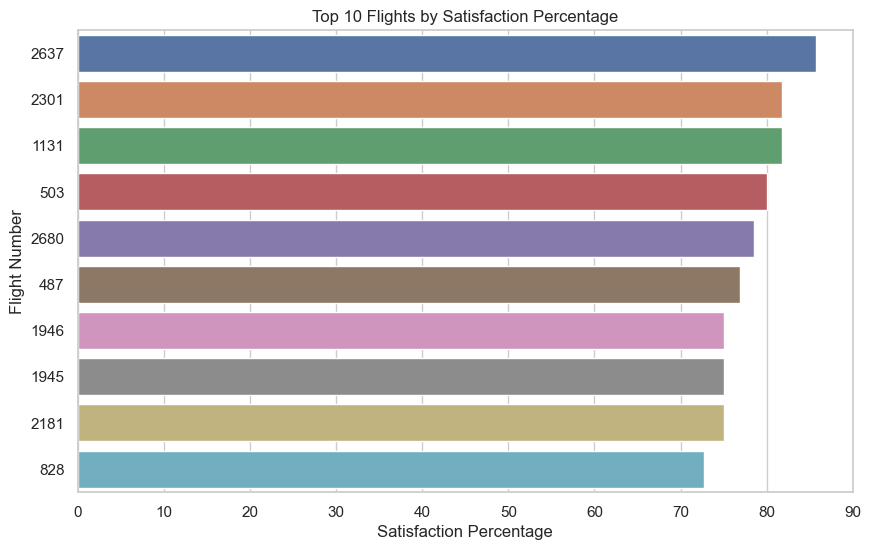

In [72]:
satisfied_counts = filtered_data[filtered_data['score'].isin([4, 5])].groupby('flight_number')['score'].count()
total_counts = filtered_data.groupby('flight_number')['score'].count()
satisfaction_percentages = (satisfied_counts / total_counts) * 100

flight_number_ssp = pd.DataFrame({
    'Flight Number': satisfaction_percentages.index,
    'Satisfaction Percentage': satisfaction_percentages.values
})

flight_number_ssp['Flight Number'] = flight_number_ssp['Flight Number'].astype(str)

top_flights = flight_number_ssp.sort_values('Satisfaction Percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Satisfaction Percentage', y='Flight Number', data=top_flights, orient='h')
plt.title('Top 10 Flights by Satisfaction Percentage')
plt.xlabel('Satisfaction Percentage')
plt.ylabel('Flight Number')
plt.show()


In [84]:
ss1['destination_station_code'].value_counts()

EWX    5019
IAX    5007
ORX    3503
DEX    3137
SFX    2915
       ... 
WYX       1
HLX       1
ZIX       1
OAX       1
TKX       1
Name: destination_station_code, Length: 212, dtype: int64

In [85]:
ss1['origin_station_code'].value_counts()

IAX    4344
EWX    4011
DEX    3215
ORX    3131
SFX    2553
       ... 
DDX       1
AGX       1
CGX       1
TKX       1
DVX       1
Name: origin_station_code, Length: 213, dtype: int64

In [86]:
ss1['destination_station_code'].value_counts().describe()

count     212.000000
mean      164.919811
std       618.205489
min         1.000000
25%         8.000000
50%        26.000000
75%        93.000000
max      5019.000000
Name: destination_station_code, dtype: float64

In [87]:
ss1['origin_station_code'].value_counts().describe()

count     213.000000
mean      164.145540
std       542.927271
min         1.000000
25%        10.000000
50%        34.000000
75%       104.000000
max      4344.000000
Name: origin_station_code, dtype: float64

In [93]:
destination_station_counts = ss1['destination_station_code'].value_counts()
min_occurrences = 10
filtered_data = ss1[ss1['destination_station_code'].isin(destination_station_counts[destination_station_counts >= min_occurrences].index)]
print(filtered_data['destination_station_code'].value_counts())
print(filtered_data['destination_station_code'].describe())


EWX    5019
IAX    5007
ORX    3503
DEX    3137
SFX    2915
       ... 
UIX      11
SHX      10
MOX      10
SPX      10
XNX      10
Name: destination_station_code, Length: 153, dtype: int64
count     34711
unique      153
top         EWX
freq       5019
Name: destination_station_code, dtype: object


In [89]:
origin_station_counts = ss1['origin_station_code'].value_counts()
min_occurrences = 10
filtered_data = ss1[ss1['origin_station_code'].isin(origin_station_counts[origin_station_counts >= min_occurrences].index)]
print(filtered_data['origin_station_code'].value_counts())
print(filtered_data['origin_station_code'].describe())


IAX    4344
EWX    4011
DEX    3215
ORX    3131
SFX    2553
       ... 
MDX      11
GDX      11
QRX      10
BJX      10
LFX      10
Name: origin_station_code, Length: 160, dtype: int64
count     34726
unique      160
top         IAX
freq       4344
Name: origin_station_code, dtype: object


In [94]:
satisfied_counts_destination = filtered_data[filtered_data['score'].isin([4, 5])].groupby('destination_station_code')['score'].count()
total_counts_destination = filtered_data.groupby('destination_station_code')['score'].count()
satisfaction_percentages_destination = (satisfied_counts_destination / total_counts_destination) * 100

destination_station_ssp = pd.DataFrame({
    'Destination Station Code': satisfaction_percentages_destination.index,
    'Satisfaction Percentage': satisfaction_percentages_destination.values
})

print(destination_station_ssp)


    Destination Station Code  Satisfaction Percentage
0                        ABX                45.454545
1                        ACX                39.285714
2                        ALX                34.146341
3                        AMX                28.310502
4                        ANX                24.242424
..                       ...                      ...
148                      YQX                26.666667
149                      YUX                16.666667
150                      YVX                39.784946
151                      YYX                27.777778
152                      ZRX                28.030303

[153 rows x 2 columns]


In [91]:
satisfied_counts_origin = filtered_data[filtered_data['score'].isin([4, 5])].groupby('origin_station_code')['score'].count()
total_counts_origin = filtered_data.groupby('origin_station_code')['score'].count()
satisfaction_percentages_origin = (satisfied_counts_origin / total_counts_origin) * 100

origin_station_ssp = pd.DataFrame({
    'Origin Station Code': satisfaction_percentages_origin.index,
    'Satisfaction Percentage': satisfaction_percentages_origin.values
})

print(origin_station_ssp)


    Origin Station Code  Satisfaction Percentage
0                   ABX                38.888889
1                   ACX                43.750000
2                   ALX                29.411765
3                   AMX                37.387387
4                   ANX                23.157895
..                  ...                      ...
155                 YQX                35.000000
156                 YUX                27.272727
157                 YVX                25.238095
158                 YYX                46.153846
159                 ZRX                42.857143

[160 rows x 2 columns]


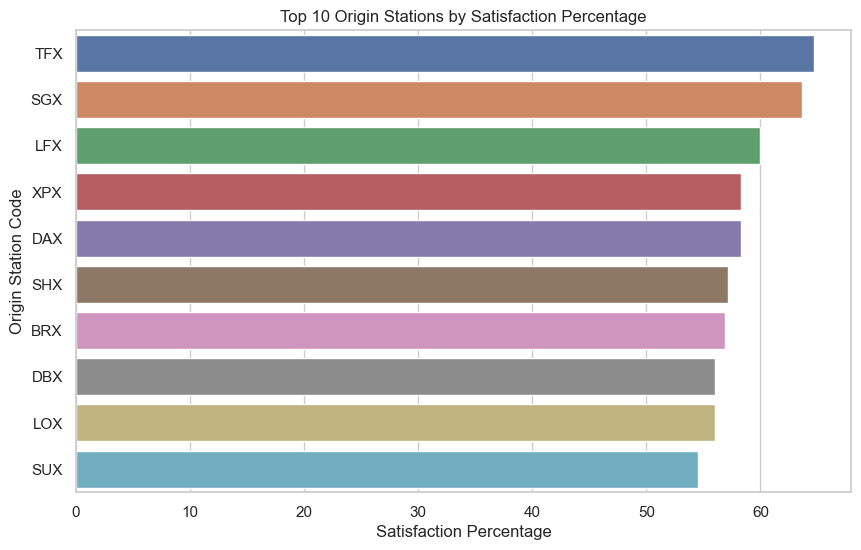

In [92]:
top_origin_stations = origin_station_ssp.sort_values('Satisfaction Percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Satisfaction Percentage', y='Origin Station Code', data=top_origin_stations, orient='h')
plt.title('Top 10 Origin Stations by Satisfaction Percentage')
plt.xlabel('Satisfaction Percentage')
plt.ylabel('Origin Station Code')
plt.show()


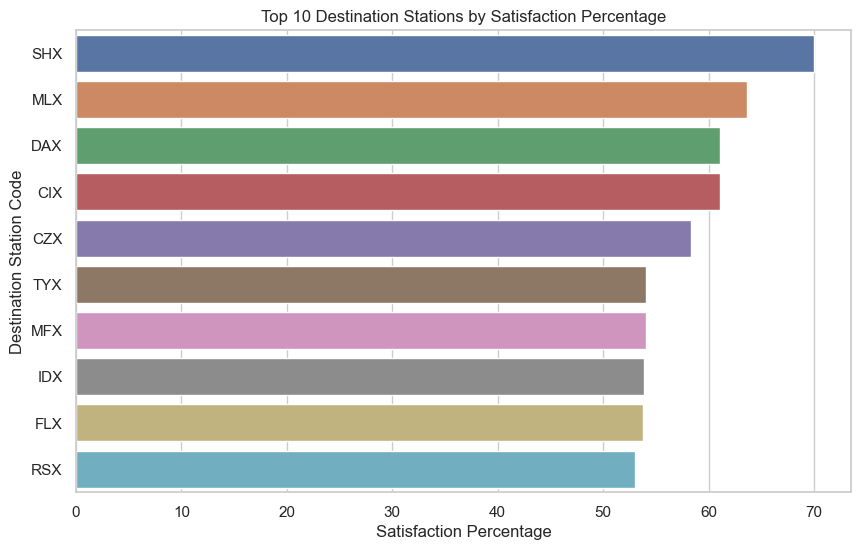

In [95]:
top_destination_stations = destination_station_ssp.sort_values('Satisfaction Percentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Satisfaction Percentage', y='Destination Station Code', data=top_destination_stations, orient='h')
plt.title('Top 10 Destination Stations by Satisfaction Percentage')
plt.xlabel('Satisfaction Percentage')
plt.ylabel('Destination Station Code')
plt.show()


In [103]:
id3=pd.read_csv("Inflight Service_Inventory data Clean.csv")
id3 = id3.drop(columns=['Unnamed: 0'])
id3

,flight_number,departure_station_code,arrival_station_code,scheduled_departure_dtl,entree_product_id,entree_description,entree_code,planned_entree_count,consumed_entree_count
0,2634,IAX,PDX,2022-09-01,58019,Belgium waffle,WF,20,32
1,2666,ORX,IAX,2022-09-01,60549,Vegetarian chili and polenta cake,V,3,0
2,2310,DEX,SAX,2022-09-02,58981,Scrambled eggs,O,9,7
3,1712,SFX,CLX,2022-09-04,58764,Mediterranean Falafel Bowl,V,1,0
4,1225,LAX,HNX,2022-09-08,60549,Vegetarian chili and polenta cake,V,1,0
...,...,...,...,...,...,...,...,...,...
61262,711,ORX,AUX,2022-09-20,61524,Scrambled eggs,O,6,5
61263,1914,IAX,LAX,2022-09-30,61360,Brioche cheeseburger,B,3,0
61264,1417,IAX,LAX,2022-09-23,60987,Impossible Meatball Bowl,V,6,5
61265,1005,LAX,ITX,2022-09-30,54759,Seared beef short rib,B,6,0


In [104]:
pd4=pd.read_csv("Inflight Service_Pre order data Clean.csv")
pd4 = pd4.drop(columns=['Unnamed: 0'])
pd4

,flight_number,departure_station_code,arrival_station_code,record_locator,carrier_code,scheduled_departure_dtl,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,1423,INX,DEX,B3XX1H,UA,2022-09-01,J,ENTREES HOT,POULTRY,"Za'atar chicken with spinach, roasted peppers,...","Za'atar chicken with spinach, roasted peppers,...",Y,1
1,1620,IAX,CUX,BFXXJC,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,2
2,1852,ORX,PDX,DPXX2H,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Tomato and kale baked egg,Tomato and kale baked egg with fire roasted re...,Y,1
3,548,IAX,SFX,ELXX8H,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Scrambled eggs,"Scrambled eggs with ham, onion and peppers",Y,2
4,1155,IAX,CUX,NCXX4S,UA,2022-09-02,J,ENTREES HOT,BREAKFAST,Belgium waffle,Belgium waffle with bourbon banana fosters sau...,Y,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212034,2189,DEX,FLX,PDXXCY,UA,2022-09-14,Y,UNITED CATERER OWNED 88-3F,SNACKS,SkinnyDipped® Lemon Bliss Almonds,NaN,N,1
212035,1618,LAX,ORX,KZXXFK,UA,2022-09-14,Y,ALCOHOL BEVERAGES,GENERIC INT WINE A,Sparkling Wine,NaN,N,1
212036,1498,SFX,IAX,O3XX7J,UA,2022-09-11,Y,ALCOHOL BEVERAGES,GENERIC INT WINE A,Red Wine,Red Wine 187ml,N,1
212037,1830,EWX,SFX,BQXXYW,UA,2022-09-14,Y,LIQUOR,LIQUOR,Buffalo Trace,NaN,N,1


In [105]:
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34963 entries, 0 to 34962
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     34963 non-null  int64         
 1   origin_station_code               34963 non-null  object        
 2   destination_station_code          34963 non-null  object        
 3   record_locator                    34963 non-null  object        
 4   scheduled_departure_date          34963 non-null  datetime64[ns]
 5   question_text1                    34963 non-null  object        
 6   score                             34963 non-null  int64         
 7   satisfaction_type                 34963 non-null  object        
 8   question_text2                    34963 non-null  object        
 9   item_selected                     34963 non-null  object        
 10  driver_sub_group1                 34963 non-nu

In [106]:
id3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61267 entries, 0 to 61266
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   flight_number            61267 non-null  int64 
 1   departure_station_code   61267 non-null  object
 2   arrival_station_code     61267 non-null  object
 3   scheduled_departure_dtl  61267 non-null  object
 4   entree_product_id        61267 non-null  int64 
 5   entree_description       61267 non-null  object
 6   entree_code              61267 non-null  object
 7   planned_entree_count     61267 non-null  int64 
 8   consumed_entree_count    61267 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 4.2+ MB


In [107]:
pd4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212039 entries, 0 to 212038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   flight_number            212039 non-null  int64 
 1   departure_station_code   212039 non-null  object
 2   arrival_station_code     212039 non-null  object
 3   record_locator           212039 non-null  object
 4   carrier_code             212039 non-null  object
 5   scheduled_departure_dtl  212039 non-null  object
 6   cabin_code               212039 non-null  object
 7   meal_group               212039 non-null  object
 8   meal_category            212039 non-null  object
 9   meal_short_description   212039 non-null  object
 10  meal_description         137062 non-null  object
 11  is_entree                212039 non-null  object
 12  pre_order_qty            212039 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 21.0+ MB


In [108]:
columns_to_select = ['cabin_code','meal_group','meal_category','meal_short_description','meal_description','is_entree','pre_order_qty','record_locator']
merged_df = ss1.merge(pd4[columns_to_select], how='left', left_on='record_locator', right_on='record_locator')
merged_df


,flight_number,origin_station_code,destination_station_code,record_locator,scheduled_departure_date,question_text1,score,satisfaction_type,question_text2,item_selected,...,hub_spoke,grouped_cabin_class,grouped_haul_type,cabin_code,meal_group,meal_category,meal_short_description,meal_description,is_entree,pre_order_qty
0,3802,MKX,ORX,CYXXJJ,2022-09-01,How satisfied were you with the food & beverag...,2,Dissatisfied,What item did you choose?,Not-Asked,...,spoke departure,Economy,Short,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4645,COX,DEX,DRXXMH,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,spoke departure,Business,Short,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5236,COX,DEX,DEXXS1,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,spoke departure,Business,Short,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4686,DEX,COX,PXXXLH,2022-09-01,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,Not-Asked,...,hub departure,Economy,Short,J,ENTREES HOT,VEGETARIAN,Impossible™ Meatball Bowl,Impossible Meatball Bowl with Impossible Meatb...,Y,3.0
4,671,DEX,COX,KZXXH5,2022-09-01,How satisfied were you with the food & beverag...,5,Satisfied,What item did you choose?,Not-Asked,...,hub departure,Business,Short,J,ENTREES HOT,POULTRY,Za’atar chicken,NaN,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44774,189,EWX,JNX,O0XXXP,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,hub departure,Economy,Long,J,ENTREES HOT,POULTRY,Za’atar chicken,NaN,Y,1.0
44775,188,JNX,EWX,E6XXCG,2022-09-30,How satisfied were you with the food & beverag...,3,Dissatisfied,What item did you choose?,vegetarian entrée,...,spoke departure,Economy,Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44776,2,SFX,SIX,IPXXM3,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,Not-Asked,...,hub departure,Economy,Long,J,ENTREES HOT,VEGETARIAN,Impossible™ Meatball Bowl,NaN,Y,3.0
44777,2,SFX,SIX,O5XXK4,2022-09-30,How satisfied were you with the food & beverag...,4,Satisfied,What item did you choose?,chicken entrée,...,hub departure,Economy,Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_=merged_df[~merged_df['cabin_code'].isnull()][['score','meal_group','meal_category','is_entree','pre_order_qty']]
df_

,score,meal_group,meal_category,is_entree,pre_order_qty
3,3,ENTREES HOT,VEGETARIAN,Y,3.0
4,5,ENTREES HOT,POULTRY,Y,1.0
5,5,ENTREES HOT,POULTRY,Y,1.0
6,5,ENTREES HOT,POULTRY,Y,1.0
7,5,ENTREES HOT,BEEF/VEAL,Y,1.0
...,...,...,...,...,...
44771,5,Inventory Food,Inventory Food,N,0.0
44772,5,ENTREES HOT,POULTRY,Y,1.0
44773,2,ENTREES HOT,POULTRY,Y,3.0
44774,4,ENTREES HOT,POULTRY,Y,1.0


In [112]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21966 entries, 3 to 44776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          21966 non-null  int64  
 1   meal_group     21966 non-null  object 
 2   meal_category  21966 non-null  object 
 3   is_entree      21966 non-null  object 
 4   pre_order_qty  21966 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.0+ MB


## Meal Group Analysis with Score

In [113]:
df_['meal_group'].value_counts()

ENTREES HOT                   15909
UNITED CATERER OWNED 88-3F     3121
Inventory Food                 1401
LIQUOR                          445
ALCOHOL BEVERAGES               410
No Food                         242
BEER                            204
ENTREES COLD                    190
Club Food                        41
SANDWICHES                        3
Name: meal_group, dtype: int64

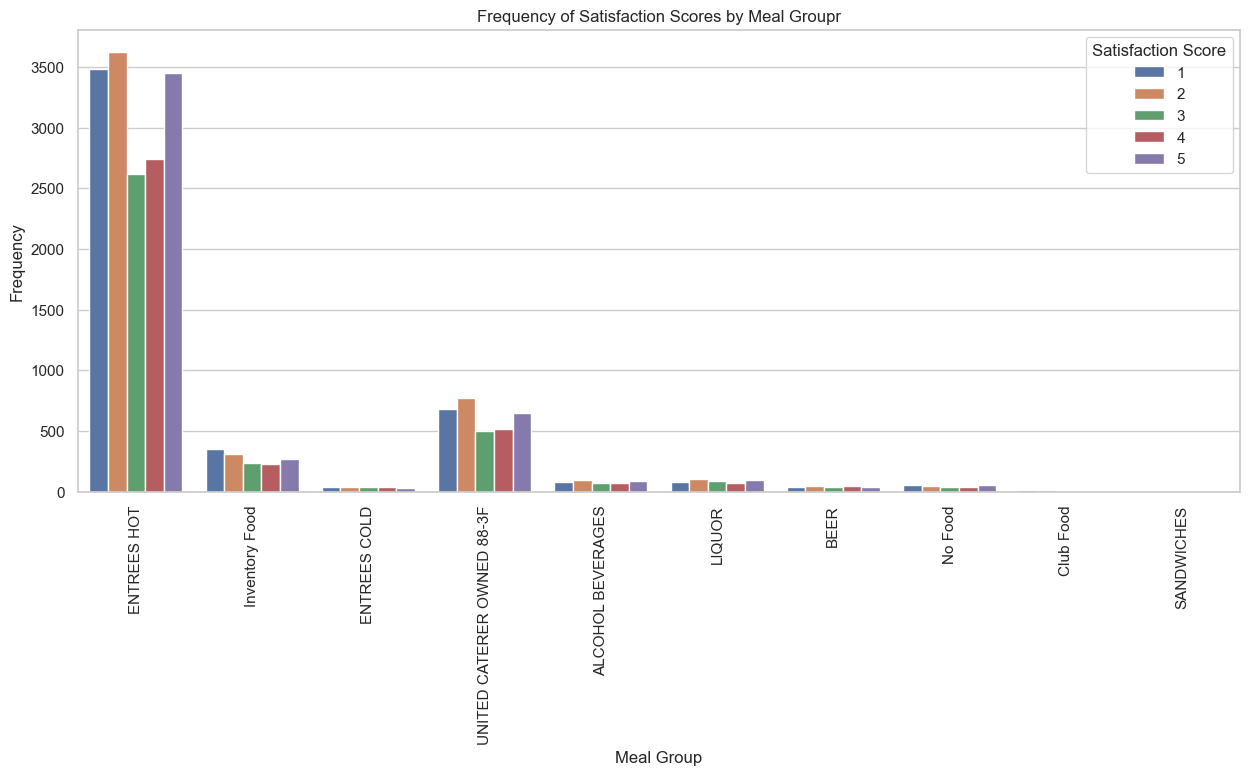

In [120]:
plt.figure(figsize=(15, 6))
sns.countplot(x='meal_group', hue='score', data=df_)
plt.title('Frequency of Satisfaction Scores by Meal Groupr')
plt.xlabel('Meal Group')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Satisfaction Score')
plt.show()


In [121]:
from scipy import stats

grouped_data = [group['score'] for name, group in df_.groupby('meal_group')]
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")


ANOVA results: F-statistic = 1.47, p-value = 0.1511


In [128]:
satisfied_counts_group = df_[df_['score'].isin([4, 5])].groupby('meal_group')['score'].count()
total_counts_group = df_.groupby('meal_group')['score'].count()
satisfaction_scores_group = (satisfied_counts_group / total_counts_group) * 100

for meal_group, satisfaction_score in satisfaction_scores_group.items():
    print(f"Inflight Satisfaction Score for {meal_group}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for ALCOHOL BEVERAGES: 39.27%
Inflight Satisfaction Score for BEER: 39.71%
Inflight Satisfaction Score for Club Food: 36.59%
Inflight Satisfaction Score for ENTREES COLD: 37.37%
Inflight Satisfaction Score for ENTREES HOT: 38.92%
Inflight Satisfaction Score for Inventory Food: 35.47%
Inflight Satisfaction Score for LIQUOR: 37.75%
Inflight Satisfaction Score for No Food: 41.32%
Inflight Satisfaction Score for SANDWICHES: nan%
Inflight Satisfaction Score for UNITED CATERER OWNED 88-3F: 37.30%


### The ANOVA results with an F-statistic of 1.47 and a p-value of 0.1511 suggest that there may not be a significant difference in satisfaction scores among the different meal groups. The p-value is above the typical significance level of 0.05, which indicates that we do not have enough evidence to reject the null hypothesis that the means of the satisfaction scores are equal across the meal groups.

## Meal Category Analysis with Score



In [122]:
df_['meal_category'].value_counts()

BREAKFAST             5431
POULTRY               4148
VEGETARIAN            3242
SNACKS                3121
BEEF/VEAL             2809
Inventory Food        1401
LIQUOR                 445
GENERIC INT WINE A     410
No Food                242
BEER                   204
CHEESE                 184
PASTA                  109
SEAFOOD                 68
Club Food               41
Kosher                  41
Gluten-Free             38
PORK                    14
DINNER                   8
VARIETY                  6
SANDWICH                 3
VEGETABLE                1
Name: meal_category, dtype: int64

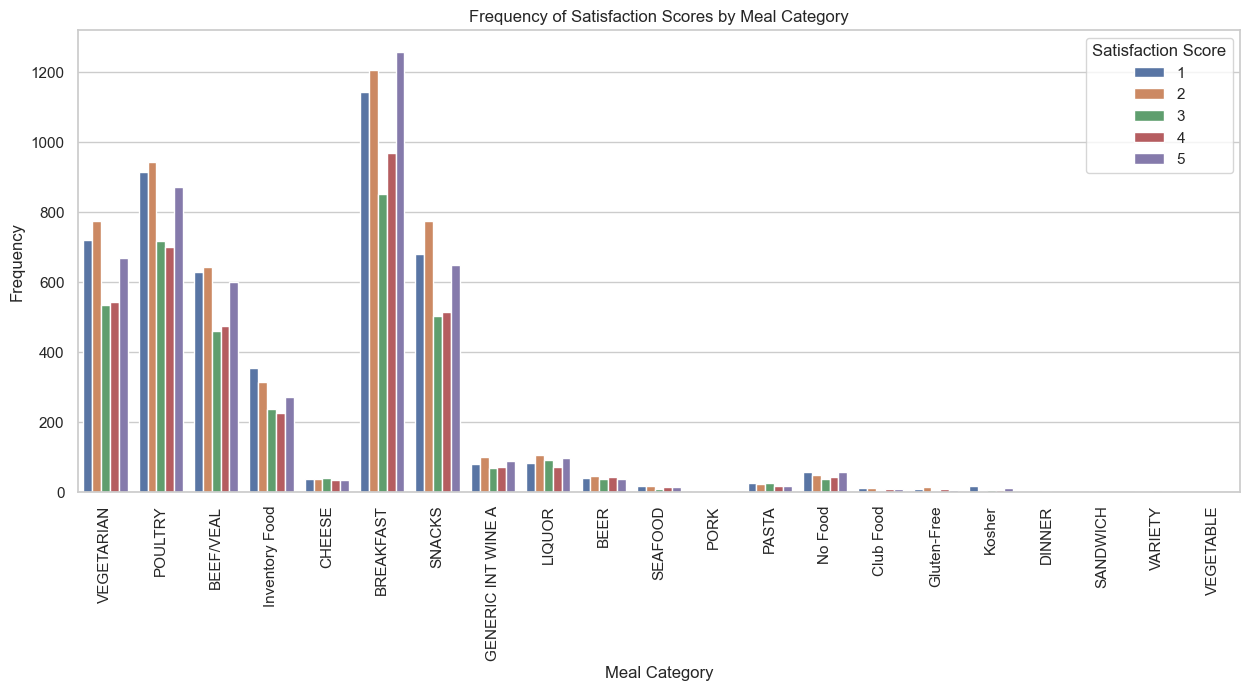

In [123]:
plt.figure(figsize=(15, 6))
sns.countplot(x='meal_category', hue='score', data=df_)
plt.title('Frequency of Satisfaction Scores by Meal Category')
plt.xlabel('Meal Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Satisfaction Score')
plt.show()


In [124]:
from scipy import stats

grouped_data = [group['score'] for name, group in df_.groupby('meal_category')]
f_statistic, p_value = stats.f_oneway(*grouped_data)
print(f"ANOVA results: F-statistic = {f_statistic:.2f}, p-value = {p_value:.4f}")



ANOVA results: F-statistic = 1.82, p-value = 0.0139


In [126]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_result = pairwise_tukeyhsd(df_['score'], df_['meal_category'])
print(tukey_result)


C:\Users\Acer\anaconda3\envs\peace\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
         BEEF/VEAL               BEER   0.0409    1.0 -0.3367  0.4185  False
         BEEF/VEAL          BREAKFAST   0.0788 0.7407 -0.0422  0.1998  False
         BEEF/VEAL             CHEESE   0.0258    1.0 -0.3705   0.422  False
         BEEF/VEAL          Club Food  -0.2126    1.0 -1.0317  0.6066  False
         BEEF/VEAL             DINNER   1.0801 0.8786 -0.7636  2.9238  False
         BEEF/VEAL GENERIC INT WINE A   0.0508    1.0 -0.2245  0.3261  False
         BEEF/VEAL        Gluten-Free  -0.1041    1.0 -0.9545  0.7463  False
         BEEF/VEAL     Inventory Food  -0.0998 0.8786 -0.2701  0.0705  False
         BEEF/VEAL             Kosher  -0.2126    1.0 -1.0317  0.6066  False
         BEEF/VEAL             LIQUOR   0.0689    1.0 -0.1968  0.3345  False

In [127]:
satisfied_counts = df_[df_['score'].isin([4, 5])].groupby('meal_category')['score'].count()
total_counts = df_.groupby('meal_category')['score'].count()
satisfaction_scores = (satisfied_counts / total_counts) * 100

for meal_category, satisfaction_score in satisfaction_scores.items():
    print(f"Inflight Satisfaction Score for {meal_category}: {satisfaction_score:.2f}%")


Inflight Satisfaction Score for BEEF/VEAL: 38.31%
Inflight Satisfaction Score for BEER: 39.71%
Inflight Satisfaction Score for BREAKFAST: 41.02%
Inflight Satisfaction Score for CHEESE: 37.50%
Inflight Satisfaction Score for Club Food: 36.59%
Inflight Satisfaction Score for DINNER: 62.50%
Inflight Satisfaction Score for GENERIC INT WINE A: 39.27%
Inflight Satisfaction Score for Gluten-Free: 36.84%
Inflight Satisfaction Score for Inventory Food: 35.47%
Inflight Satisfaction Score for Kosher: 39.02%
Inflight Satisfaction Score for LIQUOR: 37.75%
Inflight Satisfaction Score for No Food: 41.32%
Inflight Satisfaction Score for PASTA: 33.03%
Inflight Satisfaction Score for PORK: 21.43%
Inflight Satisfaction Score for POULTRY: 37.90%
Inflight Satisfaction Score for SANDWICH: nan%
Inflight Satisfaction Score for SEAFOOD: 39.71%
Inflight Satisfaction Score for SNACKS: 37.30%
Inflight Satisfaction Score for VARIETY: 33.33%
Inflight Satisfaction Score for VEGETABLE: 100.00%
Inflight Satisfaction S

### Many pairs of meal categories do not show statistically significant differences in satisfaction scores. This means that the differences observed in the mean scores of these pairs could likely be due to random chance rather than meaningful distinctions.
### Some pairs of meal categories do show statistically significant differences in satisfaction scores. The pair "BREAKFAST" and "Inventory Food" has a significant difference, with "Inventory Food" having a higher mean satisfaction score compared to "BREAKFAST".

## Entree Analysis With Score


In [129]:
df_['is_entree'].value_counts()

Y    16102
N     5864
Name: is_entree, dtype: int64

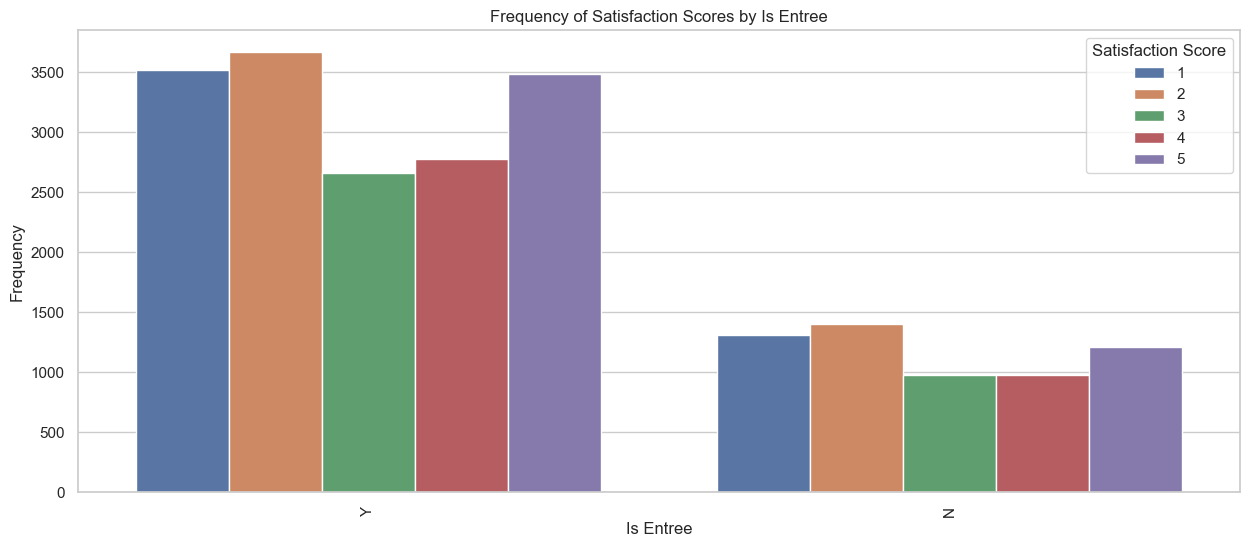

In [130]:
plt.figure(figsize=(15, 6))
sns.countplot(x='is_entree', hue='score', data=df_)
plt.title('Frequency of Satisfaction Scores by Is Entree')
plt.xlabel('Is Entree')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(title='Satisfaction Score')
plt.show()


In [134]:
from scipy import stats

entree_scores = df_[df_['meal_category'] == 'Entree']['score']
overall_scores = df_['score']

t_statistic, p_value = stats.ttest_ind(entree_scores, overall_scores)

alpha = 0.05
if p_value < alpha:
    print("The difference in satisfaction scores is statistically significant.")
else:
    print("The difference in satisfaction scores is not statistically significant.")


The difference in satisfaction scores is not statistically significant.
